In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2016.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 50
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 50
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.521417
0    0.478583
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.54201
0    0.45799
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
607,LAA,33.524691,4.425926,8.703704,4.234568,4.204444,2.907407,6.117284,37.290123,0.253123,...,10.956790,13.672840,6.462963,0.000000,50.617284,1.465409,0.496855,-0.009241,-0.120370,1
608,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,12.819876,14.583851,6.944099,0.000000,53.105590,1.575949,0.493671,0.059988,0.422360,1
609,MIN,34.679012,4.456790,8.697531,4.259259,4.135864,3.166667,8.802469,38.549383,0.245883,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
610,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,13.969136,13.481481,7.308642,0.006173,47.030864,1.559006,0.552795,-0.033364,-0.499383,1
611,NYM,33.697531,4.141975,8.283951,4.006173,4.064568,3.191358,8.037037,37.746914,0.239772,...,13.129630,14.141975,7.154321,0.006173,52.814815,1.456250,0.506250,0.056568,0.306173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,HOU,34.228395,4.469136,8.438272,4.253086,4.150864,3.419753,8.962963,38.296296,0.242117,...,11.833333,14.907407,7.006173,0.006173,51.216049,1.367089,0.360759,0.009222,0.217284,0
1210,SEA,34.462963,4.740741,8.925926,4.537037,4.618457,3.123457,7.950617,38.438272,0.252698,...,12.197531,14.172840,6.666667,0.012346,49.388889,1.316456,0.405063,-0.009556,-0.095062,1
1211,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,13.518519,14.024691,7.074074,0.006173,49.561728,1.450000,0.437500,-0.002043,-0.071605,0
1212,WSN,33.888889,4.709877,8.660494,4.537037,4.564630,3.308642,7.728395,38.277778,0.250728,...,11.845679,15.308642,7.648148,0.000000,50.419753,1.139241,0.329114,0.007222,0.048148,0


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,13.777778,13.111111,6.827160,0.006173,51.438272,1.440994,0.515528,-0.040438,-0.433333,1
1,KCR,34.271605,4.166667,8.950617,3.950617,3.969568,2.358025,7.555556,37.358025,0.256889,...,12.104938,13.851852,6.907407,0.000000,52.382716,1.493750,0.318750,0.035586,0.180864,1
2,TBR,33.833333,4.148148,8.228395,3.993827,4.000864,2.771605,9.148148,37.320988,0.237667,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
3,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,11.833333,14.907407,7.006173,0.006173,51.216049,1.367089,0.360759,0.009222,0.217284,0
4,ARI,34.969136,4.641975,9.129630,4.376543,4.270370,2.858025,8.808642,38.641975,0.254932,...,13.969136,13.481481,7.308642,0.006173,47.030864,1.559006,0.552795,-0.033364,-0.499383,0


In [13]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
607,LAA,33.524691,4.425926,8.703704,4.234568,4.204444,2.907407,6.117284,37.290123,0.253123,...,10.956790,13.672840,6.462963,0.000000,50.617284,1.465409,0.496855,-0.009241,-0.120370,1
608,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,12.819876,14.583851,6.944099,0.000000,53.105590,1.575949,0.493671,0.059988,0.422360,1
609,MIN,34.679012,4.456790,8.697531,4.259259,4.135864,3.166667,8.802469,38.549383,0.245883,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
610,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,13.969136,13.481481,7.308642,0.006173,47.030864,1.559006,0.552795,-0.033364,-0.499383,1
611,NYM,33.697531,4.141975,8.283951,4.006173,4.064568,3.191358,8.037037,37.746914,0.239772,...,13.129630,14.141975,7.154321,0.006173,52.814815,1.456250,0.506250,0.056568,0.306173,1


In [14]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [15]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [19]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [20]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

## Feature Selection

In [16]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

### RFECV

In [17]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 115
criterion: entropy
Mean Cross-Val Score: 0.49423528211407
Train Mean Accuracy: 0.7380560131795717
Test Mean Accuracy: 0.7380560131795717
Recall Score: 0.7477203647416414
Precision Score: 0.7639751552795031
F1 score: 0.7557603686635945


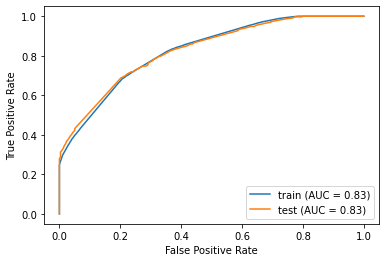

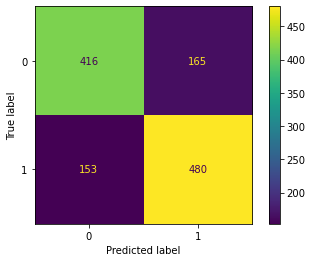

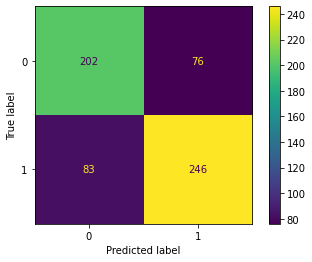

In [18]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [19]:
new_acc(probabilities)

(0.7823529411764706, 399)

### PCA

In [20]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

Number of Trees: 75
criterion: entropy
Mean Cross-Val Score: 0.5395843961500526
Train Mean Accuracy: 0.7380560131795717
Test Mean Accuracy: 0.742998352553542
Recall Score: 0.7750759878419453
Precision Score: 0.7566765578635015
F1 score: 0.7657657657657658


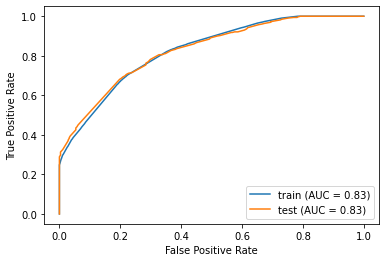

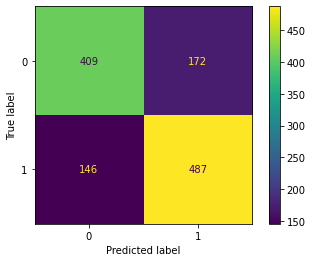

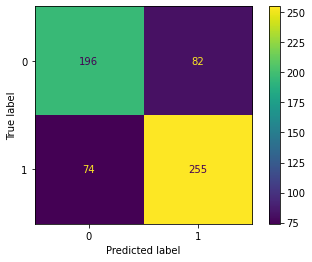

In [21]:
predictions,probabilities=random_forest(train_pca,test_pca,y_train,y_test)

In [22]:
new_acc(probabilities)

(0.785140562248996, 391)